In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/1"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/1"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/1"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/1"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/1"
pattern = "/**/*test_night*.txt"

train_A_over_iteration = None # None = best
train_B_over_iteration = None # None = best
train_C_over_iteration = None # None = best
train_A_over_ganaug_025_iteration = None # None = best
train_A_over_ganaug_050_iteration = None # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Best iterations ##

### --> All metrics are evaluated independently on their best iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
45000,0.186536,0.463886,0.116475,0.073465,0.251392,0.333107,0.094046,0.259134,0.282544,0.169401,0.366011,0.377273


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,105000,105000,162500,105000,105000,105000,105000,105000,105000,162500,105000,105000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.210533,0.504641,0.134986,0.095624,0.275509,0.39157,0.101083,0.285521,0.310961,0.19653,0.39073,0.460606


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
67500,0.201553,0.495414,0.121077,0.078645,0.279605,0.344529,0.104601,0.275913,0.308119,0.176656,0.409551,0.392424


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,97500,162500,97500,97500,110000,97500,112500,112500,112500,112500,67500,162500


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.215017,0.509731,0.150411,0.088547,0.288649,0.397183,0.11069,0.28525,0.314614,0.207886,0.409551,0.442424


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
47500,0.208996,0.505039,0.140885,0.080059,0.292285,0.347928,0.101624,0.288904,0.311908,0.180757,0.407022,0.430303


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,65000,65000,65000,102500,65000,102500,65000,65000,65000,65000,65000,102500


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.21815,0.533579,0.155314,0.091149,0.29456,0.385054,0.111096,0.294858,0.327064,0.208833,0.410674,0.465152


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.194136,0.450078,0.127781,0.066736,0.270711,0.350336,0.093775,0.28092,0.315291,0.170347,0.423315,0.428788


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,167500,107500,77500,107500,167500,167500,107500,77500,42500,77500,42500,42500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.19766,0.481537,0.142157,0.073799,0.274313,0.368992,0.103383,0.281055,0.315291,0.196215,0.423315,0.428788


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
85000,0.199882,0.466308,0.138357,0.08078,0.269303,0.358967,0.102571,0.285792,0.309337,0.204101,0.387079,0.39697


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,102500,85000,175000,85000,102500,175000,102500,102500,102500,85000,102500,175000


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.206325,0.466308,0.158105,0.08078,0.286123,0.39129,0.10406,0.288363,0.317591,0.204101,0.412921,0.456061


## Improvements ##

### train_A_over --> train_B_over ###

In [20]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.004484,0.00509,0.015425,-0.007077,0.01314,0.005613,0.009608,-0.000271,0.003654,0.011356,0.01882,-0.018182,A to B


### train_A_over --> train_C_over ###

In [21]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.007617,0.028937,0.020327,-0.004475,0.019051,-0.006516,0.010014,0.009337,0.016103,0.012303,0.019944,0.004545,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [22]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.012872,-0.023104,0.00717,-0.021825,-0.001196,-0.022578,0.0023,-0.004465,0.00433,-0.000315,0.032584,-0.031818,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [23]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.004208,-0.038334,0.023118,-0.014844,0.010615,-0.00028,0.002977,0.002842,0.006631,0.007571,0.022191,-0.004545,A to A50


## Combine ##

In [24]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050], axis = 0)

In [25]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.004484,0.00509,0.015425,-0.007077,0.01314,0.005613,0.009608,-0.000271,0.003654,0.011356,0.01882,-0.018182


Text(0, 0.5, 'Absolute change in score')

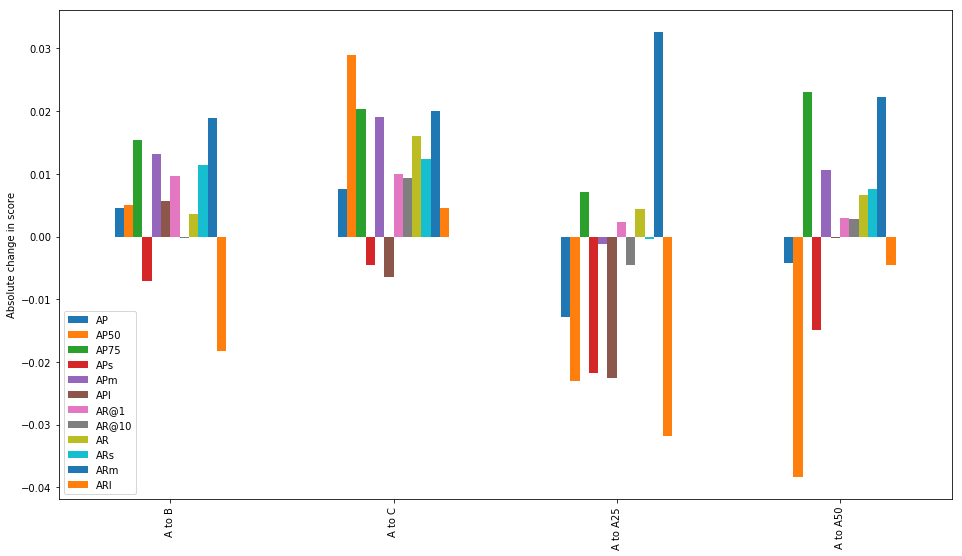

In [26]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [27]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [28]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

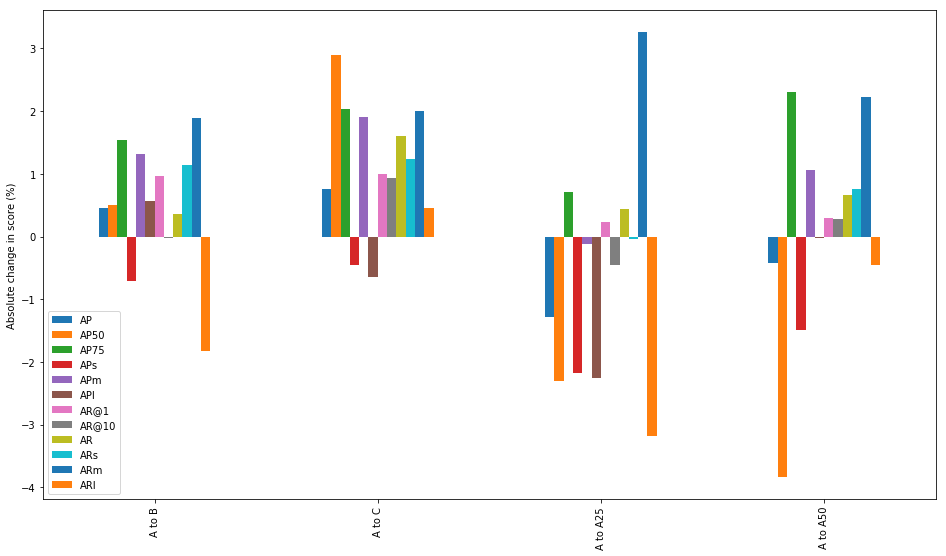

In [29]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [30]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)